# SVM : HARD MARGIN
created by Khoirul Romadhony (POWERARE)

In [ ]:
import numpy as np
import pandas as pd
# from succinctly.datasets import get_dataset, linearly_separable as ls

# X, y = get_dataset(ls.get_training_examples)
X = np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8],
               [10, 10], [2, 7], [8, 3], [7, 5], [4, 4], [4, 6],
               [1, 3], [2, 5]])
y = np.array([1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
             -1.])

data = pd.DataFrame(X,y)

In [2]:
m = X.shape[0]

In [3]:
import cvxopt.solvers
# Gram matrix - The matrix of all possible inner products of X.
K = np.array([np.dot(X[i], X[j])
              for j in range(m)
              for i in range(m)]).reshape((m, m))

P = cvxopt.matrix(np.outer(y, y) * K)
q = cvxopt.matrix(-1 * np.ones(m))

In [4]:
# Equality constraints
A = cvxopt.matrix(y, (1, m))
b = cvxopt.matrix(0.0)

In [5]:
# Inequality constraints
G = cvxopt.matrix(np.diag(-1 * np.ones(m)))
h = cvxopt.matrix(np.zeros(m))

In [6]:
# Solve the problem
solution = cvxopt.solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -3.9356e+00 -7.2072e+00  4e+01  6e+00  2e+00
 1: -5.9831e+00 -4.3032e+00  1e+01  2e+00  6e-01
 2: -5.6350e-01 -1.1535e+00  2e+00  1e-01  4e-02
 3: -6.2758e-01 -7.4538e-01  1e-01  2e-16  9e-15
 4: -7.1507e-01 -7.1641e-01  1e-03  1e-16  1e-14
 5: -7.1604e-01 -7.1605e-01  1e-05  2e-16  6e-15
 6: -7.1605e-01 -7.1605e-01  1e-07  2e-16  9e-15
Optimal solution found.


In [7]:
# Lagrange multipliers
multipliers = np.ravel(solution['x'])

In [8]:
pd.DataFrame(multipliers)

,0
0,3.222392e-09
1,1.126651e-09
2,2.622019e-09
3,3.003465e-09
4,2.645052e-01
5,4.515442e-01
6,5.628814e-09
7,2.540133e-01
8,3.145946e-09
9,4.620360e-01


In [9]:
# Support vectors have positive multipliers.
has_positive_multiplier = multipliers > 1e-7
sv_multipliers = multipliers[has_positive_multiplier]

support_vectors = X[has_positive_multiplier]
support_vectors_y = y[has_positive_multiplier]

In [10]:
pd.DataFrame(has_positive_multiplier)

,0
0,False
1,False
2,False
3,False
4,True
5,True
6,False
7,True
8,False
9,True


In [11]:
def compute_w(multipliers, X, y):
    return np.sum(multipliers[i] * y[i] * X[i]
                  for i in range(len(y)))

In [12]:
%%capture --no-display
w = compute_w(multipliers, X, y)
w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y)

print(w) 
print(w_from_sv) 

In [13]:
def compute_b(w, X, y):
    return np.sum([y[i] - np.dot(w, X[i]) 
                   for i in range(len(X))])/len(X)


In [14]:
b = compute_b(w, support_vectors, support_vectors_y)
print(b)

-9.666666925153795


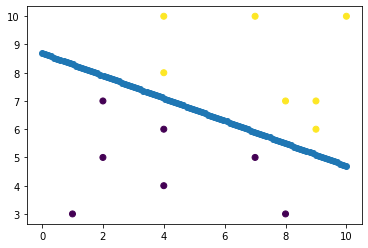

In [15]:
import matplotlib.pyplot as plt
z = np.linspace(0, 10, 100)
g = ((-(0.44444446 /1.11111114))*z)-(b/1.11111114)
plt.scatter(X[:, 0], X[:, 1], c=y )
plt.scatter(z, g)